# What is the sociodemographic composition of the European Parliament?

Data source: European Parliament

URL -- full list of the MEPs: http://www.europarl.europa.eu/meps/en/full-list/all

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import xml.etree.ElementTree as et
import time
import dateutil
from datetime import datetime
from dateutil.relativedelta import relativedelta
from functools import reduce
import joypy
import seaborn as sns
import re

pd.set_option('max.rows', 800)

In [174]:
meps = pd.read_csv('data/DODS-EU_MEPwDoB-20190627-updated.csv', delimiter='\t', encoding = 'utf-8')
meps.head()

,Day,Month,Year,DoB,Full_name,Gender,Country,National_Party,National_Party_Abbreviation,European_Party_Group,European_Party_Group_Abbreviation
0,29.0,9.0,1936.0,29.09.36,Silvio Berlusconi,M,Italy,Forward Italy,FI,European People's Party,EPP
1,3.0,7.0,1940.0,03.07.40,Jerzy Karol Buzek,M,Poland,Civic Platform,PO,European People's Party,EPP
2,24.0,8.0,1971.0,24.08.71,Aileen McLeod,F,United Kingdom,Scottish National Party,SNP,Greens-European Free Alliance,Greens-EFA
3,18.0,5.0,1976.0,18.05.76,Abir Al-Sahlani,F,Sweden,Centre Party,C,Renew Europe,RE
4,13.0,8.0,1944.0,13.08.44,José Manuel García-Margallo y Marfil,M,Spain,People's Party,PP,European People's Party,EPP


In [175]:
meps.columns

Index(['Day', 'Month', 'Year', 'DoB', 'Full_name', 'Gender', 'Country',
       'National_Party', 'National_Party_Abbreviation', 'European_Party_Group',
       'European_Party_Group_Abbreviation'],
      dtype='object')

In [186]:
total_meps = 748

# column names
ep_group = 'European_Party_Group_Abbreviation'
birthday = 'DoB'
birthyear = 'Year'
gender = 'Gender'
name = 'Full_name'
country = 'Country'

# variable names
female = 'F'
male = 'M'

In [177]:
# check whether gender value counts encompasses only binary options
# if not, go back to dataset to change input data
meps[gender].value_counts()

M    446
F    302
Name: Gender, dtype: int64

In [178]:
# check number of MEPs in incoming parliament
if len(meps) == total_meps:
    print("List includes all MEPs")

List includes all MEPs


In [179]:
len(meps)

748

In [180]:
# check for MEPs without group affiliation
len(meps[meps[ep_group]=='TBC'])

1

In [181]:
meps[meps[ep_group]=='TBC']

,Day,Month,Year,DoB,Full_name,Gender,Country,National_Party,National_Party_Abbreviation,European_Party_Group,European_Party_Group_Abbreviation
602,28.0,8.0,1990.0,28.08.90,Ivan Vilibor Sinčić,M,Croatia,Human Shield,ŽZ,Party Group To Be Confirmed,TBC


In [182]:
# check number of MEPs per country
meps[country].value_counts()

Germany           96
France            74
United Kingdom    73
Italy             73
Spain             51
Poland            51
Romania           32
Netherlands       26
Hungary           21
Czech Republic    21
Greece            21
Portugal          21
Belgium           21
Sweden            20
Austria           18
Bulgaria          17
Slovakia          13
Denmark           13
Finland           13
Ireland           11
Croatia           11
Lithuania         11
Latvia             8
Slovenia           8
Cyprus             6
Estonia            6
Luxembourg         6
Malta              6
Name: Country, dtype: int64

In [158]:
meps[ep_group].value_counts()

EPP           182
SD            152
RE            109
Greens-EFA     76
ID             73
ECR            62
EFDD           43
GUE-NGL        40
NI             10
TBC             1
Name: European_Party_Group_Abbreviation, dtype: int64

## Age structure of different parties

In [183]:
# check for NaNs -- in case of existing, go back to dataset and add by manual research
meps[meps[birthday].isnull()]

,Day,Month,Year,DoB,Full_name,Gender,Country,National_Party,National_Party_Abbreviation,European_Party_Group,European_Party_Group_Abbreviation
5,NaN,NaN,1968.0,NaN,Alexandra Geese,F,Germany,Alliance 90/The Greens,Grüne,Greens-European Free Alliance,Greens-EFA
13,NaN,NaN,1980.0,NaN,Anthony Hook,M,United Kingdom,Liberal Democrat,Lib Dem,Renew Europe,RE
30,NaN,NaN,NaN,NaN,Atije Alieva-Veli,F,Bulgaria,Movement for Rights and Freedoms,DPS,Renew Europe,RE
35,NaN,NaN,NaN,NaN,Barbara Gibson,F,United Kingdom,Liberal Democrat,Lib Dem,Renew Europe,RE
58,NaN,NaN,1982.0,NaN,Anna Cavazzini,F,Germany,Alliance 90/The Greens,Grüne,Greens-European Free Alliance,Greens-EFA
102,NaN,NaN,NaN,NaN,Caroline Voaden,F,United Kingdom,Liberal Democrat,Lib Dem,Renew Europe,RE
169,NaN,NaN,NaN,NaN,Catherine Rowett,F,United Kingdom,Green Party,Green,Greens-European Free Alliance,Greens-EFA
209,NaN,NaN,1950.0,NaN,Dinesh Dhamija,M,United Kingdom,Liberal Democrat,Lib Dem,Renew Europe,RE
217,NaN,NaN,1985.0,NaN,Daniel Freund,M,Germany,Alliance 90/The Greens,Grüne,Greens-European Free Alliance,Greens-EFA
244,NaN,NaN,NaN,NaN,Ellie Chowns,F,United Kingdom,Green Party,Green,Greens-European Free Alliance,Greens-EFA


In [185]:
print('The full date of birth is not available for',len(meps[meps[birthday].isnull()]) , 'MEP.')

The full date of birth is not available for 94 MEP.


In [188]:
# for some MEP there is at least a year of birth - no age information is available for the following number of MEP
len(meps[meps[birthyear].isnull()])

18

In [224]:
# filter out NaN
aged_meps = meps[(meps[birthyear].notnull())&(meps[ep_group]!='TBC')]

In [225]:
# reformat DOB to date formatting
aged_meps['yob'] = [value for value in aged_meps[birthyear]]
aged_meps.head()

/Users/grueng/.virtualenvs/dw_data/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Day,Month,Year,DoB,Full_name,Gender,Country,National_Party,National_Party_Abbreviation,European_Party_Group,European_Party_Group_Abbreviation,yob
0,29.0,9.0,1936.0,29.09.36,Silvio Berlusconi,M,Italy,Forward Italy,FI,European People's Party,EPP,1936.0
1,3.0,7.0,1940.0,03.07.40,Jerzy Karol Buzek,M,Poland,Civic Platform,PO,European People's Party,EPP,1940.0
2,24.0,8.0,1971.0,24.08.71,Aileen McLeod,F,United Kingdom,Scottish National Party,SNP,Greens-European Free Alliance,Greens-EFA,1971.0
3,18.0,5.0,1976.0,18.05.76,Abir Al-Sahlani,F,Sweden,Centre Party,C,Renew Europe,RE,1976.0
4,13.0,8.0,1944.0,13.08.44,José Manuel García-Margallo y Marfil,M,Spain,People's Party,PP,European People's Party,EPP,1944.0


In [226]:
# define today
today = dateutil.parser.parse(datetime.today().strftime("%Y-%m-%d"))

In [227]:
# convert yob into date format
aged_meps['yob-parsed'] = [pd.to_datetime(date, format='%Y') for date in aged_meps['yob']]
aged_meps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 747
Data columns (total 13 columns):
Day                                  653 non-null float64
Month                                660 non-null float64
Year                                 729 non-null float64
DoB                                  653 non-null object
Full_name                            729 non-null object
Gender                               729 non-null object
Country                              729 non-null object
National_Party                       729 non-null object
National_Party_Abbreviation          727 non-null object
European_Party_Group                 729 non-null object
European_Party_Group_Abbreviation    729 non-null object
yob                                  729 non-null float64
yob-parsed                           729 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 79.7+ KB


/Users/grueng/.virtualenvs/dw_data/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [228]:
# convert yob into age, based on today
# code from https://stackoverflow.com/questions/32083726/how-do-i-convert-days-into-years-and-months-in-python
aged_meps['age_years'] = [relativedelta(today, age_in_days).years for age_in_days in aged_meps['yob-parsed']]
aged_meps.head()

/Users/grueng/.virtualenvs/dw_data/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Day,Month,Year,DoB,Full_name,Gender,Country,National_Party,National_Party_Abbreviation,European_Party_Group,European_Party_Group_Abbreviation,yob,yob-parsed,age_years
0,29.0,9.0,1936.0,29.09.36,Silvio Berlusconi,M,Italy,Forward Italy,FI,European People's Party,EPP,1936.0,1936-01-01,83
1,3.0,7.0,1940.0,03.07.40,Jerzy Karol Buzek,M,Poland,Civic Platform,PO,European People's Party,EPP,1940.0,1940-01-01,79
2,24.0,8.0,1971.0,24.08.71,Aileen McLeod,F,United Kingdom,Scottish National Party,SNP,Greens-European Free Alliance,Greens-EFA,1971.0,1971-01-01,48
3,18.0,5.0,1976.0,18.05.76,Abir Al-Sahlani,F,Sweden,Centre Party,C,Renew Europe,RE,1976.0,1976-01-01,43
4,13.0,8.0,1944.0,13.08.44,José Manuel García-Margallo y Marfil,M,Spain,People's Party,PP,European People's Party,EPP,1944.0,1944-01-01,75


## Parliament overall age specs

In [229]:
# oldest
aged_meps['age_years'].max()

83

In [230]:
# youngest
aged_meps['age_years'].min()

21

In [231]:
# median
aged_meps['age_years'].median()

51.0

In [232]:
# mean
aged_meps['age_years'].mean()

50.603566529492454

## Age specs by party

In [233]:
mean = aged_meps.groupby(by=ep_group)['age_years'].mean().reset_index(name='mean_age')
mean

,European_Party_Group_Abbreviation,mean_age
0,ECR,55.193548
1,EFDD,48.135135
2,EPP,51.626374
3,GUE-NGL,48.100000
4,Greens-EFA,47.736111
5,ID,50.630137
6,NI,48.000000
7,RE,49.155340
8,SD,51.251656


In [234]:
median = aged_meps.groupby(by=ep_group)['age_years'].median().reset_index(name='median_age')
median

,European_Party_Group_Abbreviation,median_age
0,ECR,56.0
1,EFDD,50.0
2,EPP,51.0
3,GUE-NGL,46.5
4,Greens-EFA,48.0
5,ID,52.0
6,NI,47.0
7,RE,48.0
8,SD,52.0


In [235]:
youngest = aged_meps.groupby(by=ep_group)['age_years'].min().reset_index(name='age_youngest_mep')
youngest

,European_Party_Group_Abbreviation,age_youngest_mep
0,ECR,34
1,EFDD,30
2,EPP,27
3,GUE-NGL,30
4,Greens-EFA,21
5,ID,24
6,NI,34
7,RE,29
8,SD,26


In [236]:
oldest = aged_meps.groupby(by=ep_group)['age_years'].max().reset_index(name='age_oldest_mep')
oldest

,European_Party_Group_Abbreviation,age_oldest_mep
0,ECR,74
1,EFDD,72
2,EPP,83
3,GUE-NGL,66
4,Greens-EFA,78
5,ID,71
6,NI,65
7,RE,78
8,SD,73


In [237]:
age_indicators = [youngest, mean, median, oldest]

age_structure_EP_parties = reduce(lambda  left,right: pd.merge(left,right,on=[ep_group],how='outer'), age_indicators)
age_structure_EP_parties

,European_Party_Group_Abbreviation,age_youngest_mep,mean_age,median_age,age_oldest_mep
0,ECR,34,55.193548,56.0,74
1,EFDD,30,48.135135,50.0,72
2,EPP,27,51.626374,51.0,83
3,GUE-NGL,30,48.100000,46.5,66
4,Greens-EFA,21,47.736111,48.0,78
5,ID,24,50.630137,52.0,71
6,NI,34,48.000000,47.0,65
7,RE,29,49.155340,48.0,78
8,SD,26,51.251656,52.0,73


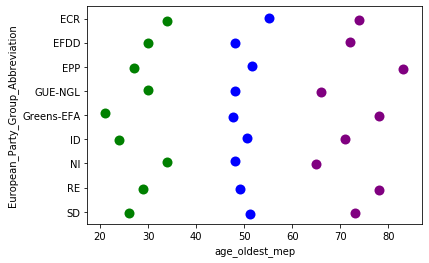

In [238]:
fig, ax = plt.subplots()
sns.stripplot(x="mean_age", y=ep_group, data=age_structure_EP_parties, size=10, color = 'blue', ax = ax, label='mean')
# sns.stripplot(x="median_age", y="politicalGroup", data=age_structure_EP_parties, size=10, color = 'red', ax = ax, label= 'median')
sns.stripplot(x="age_youngest_mep", y=ep_group, data=age_structure_EP_parties, size=10, color = 'green', ax = ax, label='youngest')
sns.stripplot(x="age_oldest_mep", y=ep_group, data=age_structure_EP_parties, size=10, color = 'purple', ax = ax, label='oldest')

In [239]:
aged_meps['age_years'].mean()

50.603566529492454

In [240]:
aged_meps['age_years'].median()

51.0

In [241]:
grouped_aged_meps = aged_meps.groupby(by=ep_group)
grouped_aged_meps['age_years'].min()

European_Party_Group_Abbreviation
ECR           34
EFDD          30
EPP           27
GUE-NGL       30
Greens-EFA    21
ID            24
NI            34
RE            29
SD            26
Name: age_years, dtype: int64

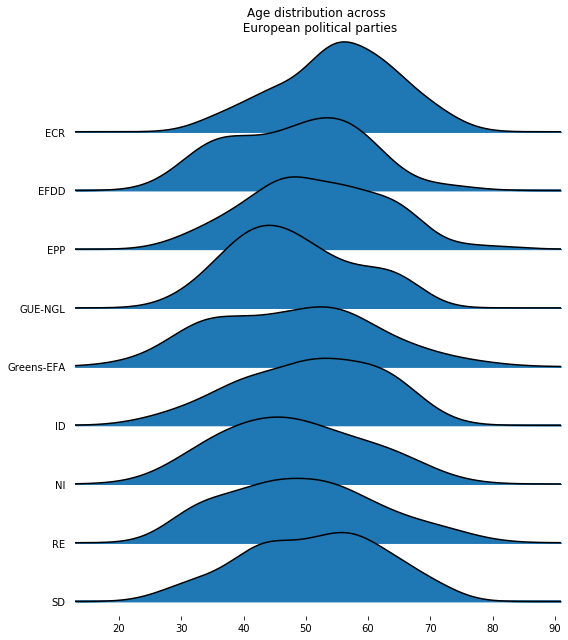

In [255]:
# http://sbebo.github.io/blog/blog/2017/08/01/joypy/
# https://www.pydoc.io/pypi/joypy-0.1.3/autoapi/joyplot/index.html
fig, axes = joypy.joyplot(grouped_aged_meps, figsize=(8,9), by=ep_group, x_range = (13,91),range_style = "all",column = 'age_years',  legend=False, title="Age distribution across \n European political parties")
#plt.savefig('charts/drafts/MEP-age-distribution-joyplot.pdf', transparent = True)

/Users/grueng/.virtualenvs/dw_data/lib/python3.7/site-packages/joypy/joyplot.py:481: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  last_axis = fig.add_subplot(1, 1, 1)


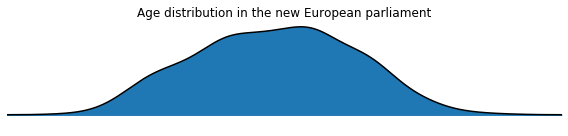

In [264]:
# Age distribution in the entire EP (irrespective of EP group)
fig, axes = joypy.joyplot(aged_meps, figsize=(8,2), x_range = (13,91),range_style = "all",column = 'age_years',  legend=False, title="Age distribution in the new European parliament")
# plt.savefig('charts/drafts/EP-age-distribution-ungrouped.pdf', transparent = True)



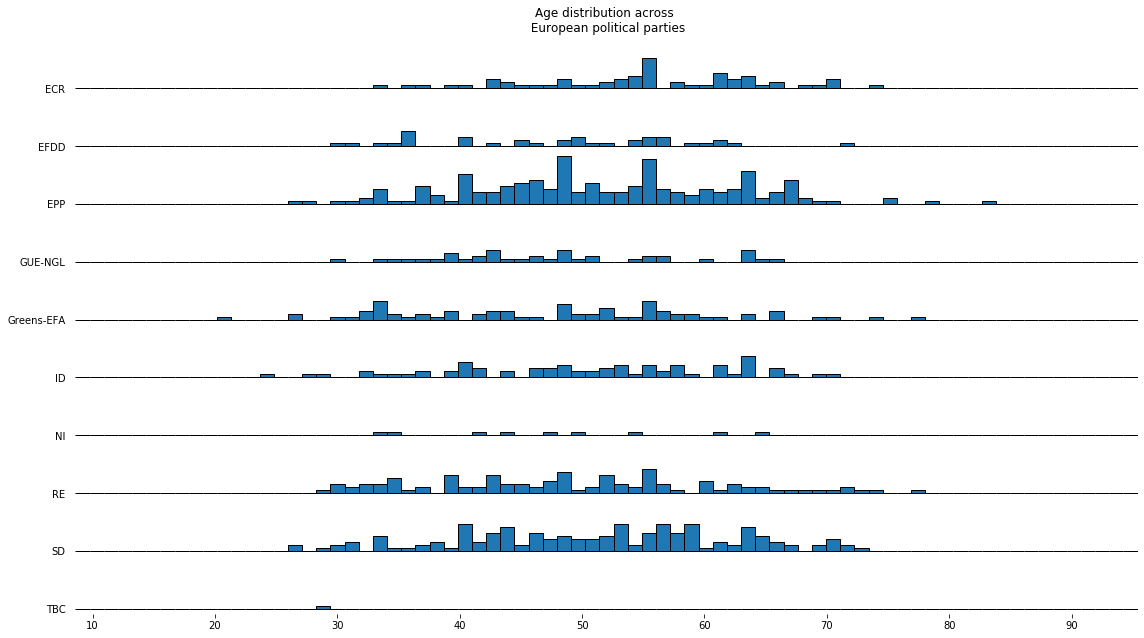

In [222]:
# http://sbebo.github.io/blog/blog/2017/08/01/joypy/
fig, axes = joypy.joyplot(aged_meps, figsize=(16,9), by=ep_group, column = 'age_years', hist = True, bins=75, overlap=0, legend=False, title="Age distribution across \n European political parties")
                          

In [223]:
#tabular data?

,Day,Month,Year,DoB,Full_name,Gender,Country,National_Party,National_Party_Abbreviation,European_Party_Group,European_Party_Group_Abbreviation,yob,yob-parsed,age_years
0,29.0,9.0,1936.0,29.09.36,Silvio Berlusconi,M,Italy,Forward Italy,FI,European People's Party,EPP,1936,1936-01-01,83
1,3.0,7.0,1940.0,03.07.40,Jerzy Karol Buzek,M,Poland,Civic Platform,PO,European People's Party,EPP,1940,1940-01-01,79
2,24.0,8.0,1971.0,24.08.71,Aileen McLeod,F,United Kingdom,Scottish National Party,SNP,Greens-European Free Alliance,Greens-EFA,1971,1971-01-01,48
3,18.0,5.0,1976.0,18.05.76,Abir Al-Sahlani,F,Sweden,Centre Party,C,Renew Europe,RE,1976,1976-01-01,43
4,13.0,8.0,1944.0,13.08.44,José Manuel García-Margallo y Marfil,M,Spain,People's Party,PP,European People's Party,EPP,1944,1944-01-01,75


# Analyse gender balance

In [160]:
meps.head()

,Day,Month,Year,DoB,Full_name,Gender,Country,National_Party,National_Party_Abbreviation,European_Party_Group,European_Party_Group_Abbreviation
0,29.0,9.0,1936.0,29.09.36,Silvio Berlusconi,M,Italy,Forward Italy,FI,European People's Party,EPP
1,3.0,7.0,1940.0,03.07.40,Jerzy Karol Buzek,M,Poland,Civic Platform,PO,European People's Party,EPP
2,24.0,8.0,1971.0,24.08.71,Aileen McLeod,F,United Kingdom,Scottish National Party,SNP,Greens-European Free Alliance,Greens-EFA
3,18.0,5.0,1976.0,18.05.76,Abir Al-Sahlani,F,Sweden,Centre Party,C,Renew Europe,RE
4,13.0,8.0,1944.0,13.08.44,José Manuel García-Margallo y Marfil,M,Spain,People's Party,PP,European People's Party,EPP


In [161]:
# double-check whether value counts encompasses only binary options
meps[gender].value_counts()

M    446
F    302
Name: Gender, dtype: int64

In [162]:
ep_gender_balance = meps.groupby(by=gender)[country].count().reset_index(name='overall_gender_count')
ep_gender_balance

,Gender,overall_gender_count
0,F,302
1,M,446


In [163]:
female_meps_total = ep_gender_balance['overall_gender_count'][0]
female_meps_total

302

In [164]:
EP_2019_share_female = female_meps_total/total_meps*100
EP_2019_share_female

40.37433155080214

In [165]:
print('The share of female MEPs in the 2019 incoming European parliament is', int(EP_2019_share_female), 'percent.')

The share of female MEPs in the 2019 incoming European parliament is 40 percent.


In [166]:
meps_total = meps.groupby(by=ep_group)[name].count().reset_index(name='number_meps')
meps_total

,European_Party_Group_Abbreviation,number_meps
0,ECR,62
1,EFDD,43
2,EPP,182
3,GUE-NGL,40
4,Greens-EFA,76
5,ID,73
6,NI,10
7,RE,109
8,SD,152
9,TBC,1


In [167]:
meps_genders = meps.groupby(by=ep_group)[gender].value_counts().reset_index(name='gender_count')
meps_genders

,European_Party_Group_Abbreviation,Gender,gender_count
0,ECR,M,42
1,ECR,F,20
2,EFDD,M,27
3,EFDD,F,16
4,EPP,M,120
5,EPP,F,62
6,GUE-NGL,M,22
7,GUE-NGL,F,18
8,Greens-EFA,F,39
9,Greens-EFA,M,37


In [168]:
meps_female = meps_genders[meps_genders[gender]==female]
meps_female

,European_Party_Group_Abbreviation,Gender,gender_count
1,ECR,F,20
3,EFDD,F,16
5,EPP,F,62
7,GUE-NGL,F,18
8,Greens-EFA,F,39
11,ID,F,29
13,NI,F,1
15,RE,F,52
17,SD,F,65


In [169]:
meps_male = meps_genders[meps_genders[gender]==male]
meps_male

,European_Party_Group_Abbreviation,Gender,gender_count
0,ECR,M,42
2,EFDD,M,27
4,EPP,M,120
6,GUE-NGL,M,22
9,Greens-EFA,M,37
10,ID,M,44
12,NI,M,9
14,RE,M,57
16,SD,M,87
18,TBC,M,1


In [170]:
gender_groups = [meps_total, meps_female, meps_male]

gender_structure_EP_parties = reduce(lambda  left,right: pd.merge(left,right,on=[ep_group],how='outer'), gender_groups)
gender_structure_EP_parties = gender_structure_EP_parties[[ep_group,'number_meps','gender_count_x','gender_count_y']]
gender_structure_EP_parties.columns =([ep_group,'number_meps','female_meps','male_meps'])
gender_structure_EP_parties

,European_Party_Group_Abbreviation,number_meps,female_meps,male_meps
0,ECR,62,20.0,42
1,EFDD,43,16.0,27
2,EPP,182,62.0,120
3,GUE-NGL,40,18.0,22
4,Greens-EFA,76,39.0,37
5,ID,73,29.0,44
6,NI,10,1.0,9
7,RE,109,52.0,57
8,SD,152,65.0,87
9,TBC,1,NaN,1


In [171]:
gender_structure_EP_parties['share_male'] = round(gender_structure_EP_parties['male_meps']/gender_structure_EP_parties['number_meps']*100)
gender_structure_EP_parties['share_female'] = round(gender_structure_EP_parties['female_meps']/gender_structure_EP_parties['number_meps']*100)
gender_structure_EP_parties['charting_male'] = gender_structure_EP_parties['share_male']*-1

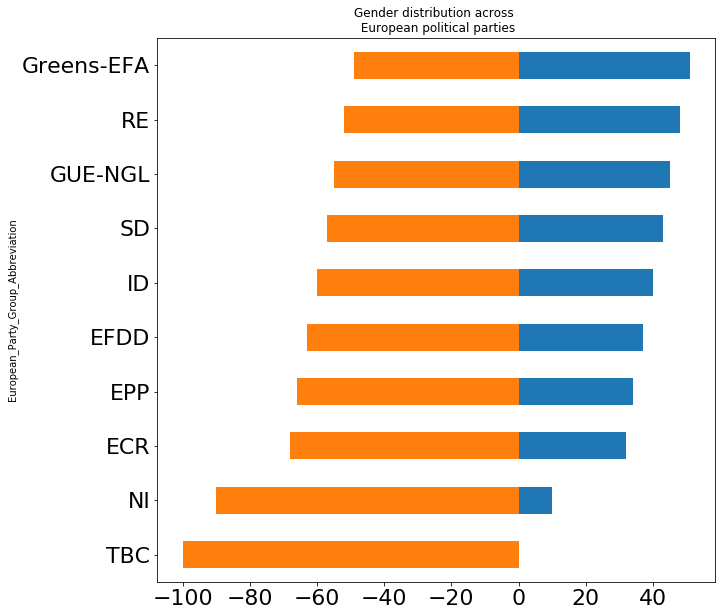

In [172]:
gender_structure_EP_parties[[ep_group, 'share_female', 'charting_male']].sort_values(by='charting_male').plot(kind='barh',stacked = True,x=ep_group, legend = False,figsize=(10,10), title="Gender distribution across \n European political parties",fontsize=22)
# plt.savefig('charts/drafts/gender-balance-by-party.pdf', transparent = True)

In [173]:
gender_structure_EP_parties.sort_values(by='share_female',ascending = False)

,European_Party_Group_Abbreviation,number_meps,female_meps,male_meps,share_male,share_female,charting_male
4,Greens-EFA,76,39.0,37,49.0,51.0,-49.0
7,RE,109,52.0,57,52.0,48.0,-52.0
3,GUE-NGL,40,18.0,22,55.0,45.0,-55.0
8,SD,152,65.0,87,57.0,43.0,-57.0
5,ID,73,29.0,44,60.0,40.0,-60.0
1,EFDD,43,16.0,27,63.0,37.0,-63.0
2,EPP,182,62.0,120,66.0,34.0,-66.0
0,ECR,62,20.0,42,68.0,32.0,-68.0
6,NI,10,1.0,9,90.0,10.0,-90.0
9,TBC,1,NaN,1,100.0,NaN,-100.0
